<h1 align="left">Inferential Statistics </h1>
<br>

![](https://drive.google.com/uc?id=1ujrKN6hY4RHYl0NXM8KDNH0b2t8uVmm7)

## Agenda for the Day
***

- Introduction to Inference
- Central Limit Theorem
- Hypothesis Testing
- P-value and Confidence Interval
- Type I and Type II error

In [ ]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv("train.csv")

# Introduction to Inference

## Random Experiment (1/2)
***
- John has a dataset on the Sale Prices of 1460 Houses in Brooklyn and is curious to experiment with his data. 

- He somehow thinks that 1460 is a lot of houses to look at! So he needs to narrow his search down a bit.

- What he does is naive but he decides to just pick 500 houses at random. 

## Random Experiment (2/2)
***

- John has a feeling that these houses might not truly represent the prices and features of the houses he can select fron the dataset.
- In simple words, he thought that these houses may be either too expensive, or too cheap as compared to the 500 
   - What he means is: The mean of the 500 houses would be pretty far away from the mean of the 1460 houses.

## John's 1st Simple Test
***
 - So John tests the mean of the 500 houses and compares it to the 1460 houses
 
 - What John has done, is nothing but build the basic concepts of Statistical Inference in himself! 

In [ ]:
np.random.seed(6)
sample_ages = np.random.choice(a= data['SalePrice'], size=500) # Sample 500 values
print ("Sample mean:", sample_ages.mean() )                         # Show sample mean
print("Population mean:", data['SalePrice'].mean())  # Show population mean

Sample mean: 177499.802
Population mean: 180921.19589041095


## Statistical Inference
***
 - Let's try and understand the words "Sample" & "Population" as these will be used a lot in Statistics
 
 - Again, let's build our intuition with the help of some easy examples 
 
 
 - While analyzing data with statistical thinking, we are often interested in the characteristics of some large population
 

## Statistical Inference
***

- But **collecting data on the entire population may be infeasible**
 
      - For example, leading up to U.S. presidential elections it could be very useful to know the political leanings of every single eligible voter, but surveying every voter is not feasible.
      - Instead, we could poll some subset of the population, such as a thousand registered voters, and use that data to make inferences about the population as a whole.
      

## Statistical Inference
***
 - This *"subset"* of the population is nothing but the **Sample** data 
 
 - We carry out various tests on the Sample to gain insight on the larger population out there! 
 
 - Therefore Statistical inference is the process of analyzing sample data to gain insight into the population from which the data was collected and to investigate differences between data samples.
 
 

## Statistical Inference
***
- In John's case, he is primarily concerned with the SalePrice of every house in Brooklyn 
    - Therefore, it's safe to assume that John's 1460 house prices is a **Sample** of the data 
    - The Population would be the price of **Every** house in Brooklyn 
    

 - But since John took a subset (i.e. 500) of the data from 1460 we can assume that: 
     - The 1460 Houses are the Population for the next few examples 
     - The 500 houses are the Sample

## Some Terminology: Point Estimates
***
Point estimates are estimates of population parameters based on sample data. 

* For instance, if we wanted to know the average age of registered voters in the U.S., we could take a survey of registered voters and then use the average age of the respondents as a point estimate of the average age of the population as a whole.

* The sample mean is usually not exactly the same as the population mean. This difference can be caused by many factors including poor survey design, biased sampling methods and the randomness inherent to drawing a sample from a population. 


## Point Estimates in John's Simple Test 
***
* John's point estimate based on a sample of 500 houses underestimates the true population mean by \$3,400, but it is close! 


* This illustrates an important point: *we can get a fairly accurate estimate of a large population by sampling a relatively small subset of individuals*

## Terminology - Parameter & Statistic 
***
 - A parameter is a descriptive measure of the population.
    - Example: Population mean, Population variance etc.
- A statistic is a  descriptive measure of the sample.
    - Example: Sample mean, Sample variance etc.
     ***
![](https://drive.google.com/uc?id=1Uk2oPyLURh8we2oWsuWKV_TOfE-lotTt)

 ***
![](https://drive.google.com/uc?id=1eRBel16Ll66CQxbACCZdq1JW3DgNP22g)

## Don't try this at home
 ***
![](https://drive.google.com/uc?id=1QIEZSWL87BDR6JbTEjQMF4U-gIbDZH4p)

#### Quiz : Inferential statistics enable you to

A. decide if the research hypothesis is true.

B. decide if the null hypothesis is false. 

C. estimate population parameters. 

D. decide if your research results are meaningful.

## Some Basic Concepts! 
***
 - Before moving on to other 'experiments' John performed with his data, let's try and uderstand some of the most commonly used concepts in Statistics
 
 - You might have heard about the term Central Limit Theorem before
 
 - Let's understand what it means and its relevance

### Central Limit Theorem  - Important! (1/2) 
***
 - The central limit theorem (CLT) is a statistical theory that states that given a sufficiently large sample size from a population with a finite level of variance, the `mean` of all samples from the same population will be approximately equal to the `mean` of the population. Furthermore, all of the samples will follow an approximate normal distribution pattern, with all variances being approximately equal to the variance of the population divided by each sample's size.

### Central Limit Theorem  - Important! (2/2)
***
- According to the central limit theorem, the mean of a sample of data will be closer to the mean of the overall population in question as the sample size increases, notwithstanding the actual distribution of the data, and whether it is normal or non-normal. As a general rule, sample sizes equal to or greater than 30 are considered sufficient for the central limit theorem to hold, meaning the distribution of the sample means is fairly normally distributed.


## Central Limit Theorem - Important (1/2)
***
* Many practices in statistics, such as those involving hypothesis testing or confidence intervals, make some assumptions concerning the population that the data was obtained from.

* One assumption that is initially made in a statistics course is that the populations that we work with are normally distributed.


## Central Limit Theorem - Important (2/2)
***

* The assumption that data is from a normal distribution simplifies matters but seems a little unrealistic.

* Just a little work with some real-world data shows that outliers, skewness, multiple peaks and asymmetry show up quite routinely like the one John encountered with `SalePrice` above.

* We can get around the problem of data from a population that is not normal. 

* The use of an appropriate sample size and the central limit theorem help us to get around the problem of data from populations that are not normal.

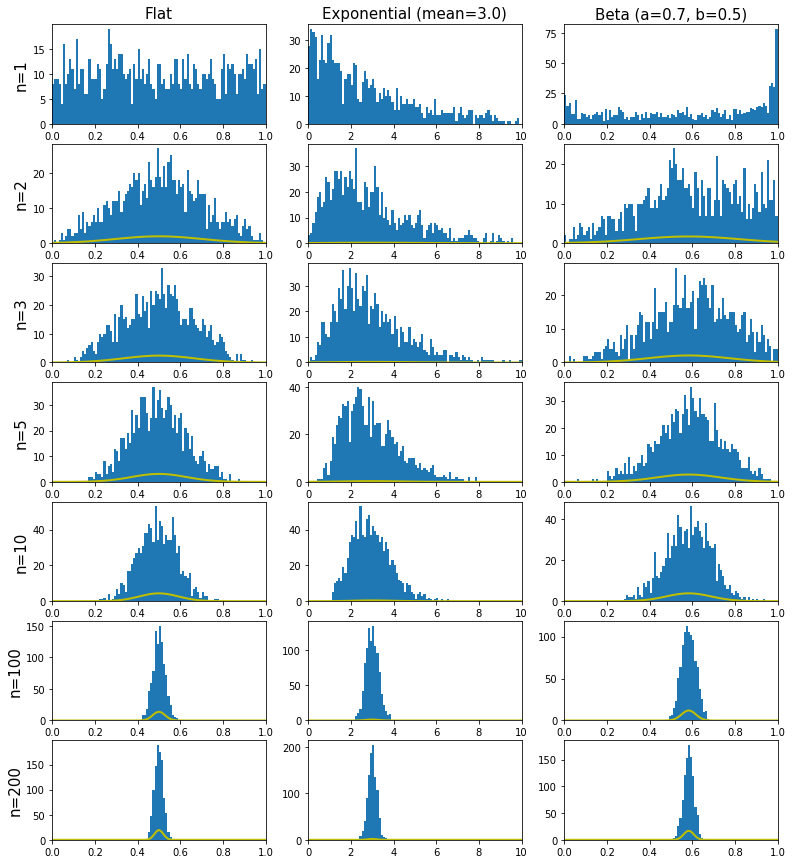

In [ ]:
from functools import partial # provides capability to define function with partial arguments

N=1000 # number of times n samples are taken. Try varying this number.
nobb=101 # number of bin boundaries on plots
n=np.array([1,2,3,5,10,100, 200]) # number of samples to average over

exp_mean=3 # mean of exponential distribution
a,b=0.7,0.5 # parameters of beta distribution

dist=[partial(np.random.random),partial(np.random.exponential,exp_mean),partial(np.random.beta,a,b)]
title_names=["Flat", "Exponential (mean=%.1f)" % exp_mean, "Beta (a=%.1f, b=%.1f)" % (a,b)]
drange=np.array([[0,1],[0,10],[0,1]]) # ranges of distributions
means=np.array([0.5,exp_mean,a/(a+b)]) # means of distributions
var=np.array([1/12,exp_mean**2,a*b/((a+b+1)*(a+b)**2)]) # variances of distributions

binrange=np.array([np.linspace(p,q,nobb) for p,q in drange])
ln,ld=len(n),len(dist)
plt.figure(figsize=((ld*4)+1,(ln*2)+1))

for i in range(ln): # loop over number of n samples to average over
    for j in range(ld): # loop over the different distributions
        plt.subplot(ln,ld,i*ld+1+j)
        plt.hist(np.mean(dist[j]((N,n[i])),1),binrange[j])
        plt.xlim(drange[j])
        if j==0:
            plt.ylabel('n=%i' % n[i],fontsize=15)        
        if i==0:
            plt.title(title_names[j], fontsize=15)
        else:
            clt=(1/(np.sqrt(2*np.pi*var[j]/n[i])))*np.exp(-(((binrange[j]-means[j])**2)*n[i]/(2*var[j])))
            plt.plot(binrange[j],clt,'y',linewidth=2)     
plt.show()

In the graphs above the yellow curve is the predicted Gaussian distribution from the Central Limit Thereom. Notice that the rate of convergence of the sample mean to the Gaussian depends on the original parent distribution. Also, 

- the mean of the Gaussian distribution is the same as the original parent distribution,
- the width of the Gaussian distribution scales as $1/\sqrt{n}$.




## In Class Activity
***
In order to understand the Central Limit Theorem and understand why distribution of  sample means is normally distributed, try tinkering around the below shiny app. Change the Parent Distribution, sample size and no of samples and see how CLT helps us make inferences about the population statistics even when the population isn't normal.


https://gallery.shinyapps.io/CLT_mean/



## In Class Activity
***

We have a dataset which contains a list of Monthly Home Sale Prices in a market. Since we are looking at all of the selling prices within the market. Calculate the population mean for the given sale prices.


$250000, $175000, $325000, $185000, $450000, $275000, $255000, $320000, $310000, $120000, $280000

- Calculate the sample mean for first 3 sale prices.
- Also, calculate the sample mean for the next three sale prices
- And compare sample means with the population mean.
- What if we calculate the sample mean multiple times, will the average of all sample means be closer to the population mean?


In [ ]:
a = [250000,175000,325000, 185000,  450000, 275000,  255000, 320000,  310000, 120000, 280000]

In [ ]:
# Calculate the sample mean for first 3 sale prices.
print(sum(a[0:3])/3)

250000.0


In [ ]:
# Calculate the sample mean for the next three sale prices
print(sum(a[3:6])/3)

303333.3333333333


In [ ]:
# Compare sample means with the population mean.
print(sum(a)/len(a))

267727.2727272727


In [ ]:
# What if we calculate the sample mean multiple times, will the average of all sample means be closer to the population mean?

import random 

no_of_sample = [5, 10, 15, 20]
avg_of_means = {}

for i in no_of_sample:
    sample_means = []
    for j in range(1,i+1):
        sample = random.sample(a,3)
        sample_means.append(sum(sample)/3)
    
    avg_of_means[i] = sum(sample_means)/i
    
print(avg_of_means)
    

{5: 296000.0, 10: 278000.0, 15: 259111.1111111111, 20: 259250.0}


#### Quiz : A distribution of sample means is a collection of sample means from

A. samples of different sizes from different populations. 

B. samples of size N from different populations. 

C. samples of size N from the same population. 

D. samples of different sizes from the same population.

## Degrees of Freedom 
***
-  central to the principle of estimating statistics of populations from samples of them. 
-  commonly abbreviated to df.
-  a mathematical restriction that needs to be put in place when estimating one statistic from an estimate of another.


## Understanding Degrees of Freedom
***

The easiest way to understand Degrees of Freedom conceptually is through an example:


- Consider a data sample consisting of, for the sake of simplicity, five positive integers. The values could be any number with no known relationship between them. This data sample would, theoretically, have five degrees of freedom.
- Four of the numbers in the sample are {3, 8, 5, and 4} and the average of the entire data sample is revealed to be 6.
- This must mean that the fifth number has to be 10. It can be nothing else. It does not have the freedom to vary.
- So the Degrees of Freedom for this data sample is 4.

## John's Second Experiment 
***
 - Now John wants to test that if he takes 1000 houses, instead of 500, will those houses contain the Population (1460 Houses) mean too? 
 
 - He thinks that it might not contain the Population mean and if so, he'll have to take another sample of 1000. So how many times would he have to do this? 
 
 - Thanks to programming, it's easy to take many samples. But he want's to be confident that the Population Mean is contained in his samples, majority of the times. 
 
 - Confused? That's ok. John basically wants to check the confidence interval of the Mean of his many samples of 1000 houses! 


## Confidence Intervals  (1/4)
***
 - A Confidence Interval is a range of values we are fairly sure our true value lies in! 
 
 - That's basically the simplest but true explanation of Confidence Interval
     ***
![](https://drive.google.com/uc?id=1coH-twv73WX-Pi7ZgNFYmt0VTrxouNY_)

## Confidence Intervals (2/4)
***
 - Let's build our intuition with the help of an example
 
 - Example: Average Height

    - We measure the heights of 40 randomly chosen men, and get a:

            - mean height of 175cm,
            - with a standard deviation of 20cm.


## Confidence Intervals (3/4)
***
 - The 95% Confidence Interval (we will learn how to calculate this later) is:
 ***
![](https://drive.google.com/uc?id=18UmG0CnNKIw8Hx6TS7E6_AFXjBbNn7Kd)

## Confidence Intervals (4/4)
***
- This says the true mean of ALL men (if we could measure their heights) is likely to be between 168.8cm and 181.2cm.

- But it might not be!

- The "95%" says that 95% of experiments like we just did will include the true mean, but 5% won't.

- So there is a 1-in-20 chance (5%) that our Confidence Interval does NOT include the true mean.

## Calculating the Confidence Interval (1/3)
***
Step 1: note down the number of samples n, and calculate the mean X and standard deviation s of those samples:

 - Number of samples: n = 40
 - Mean: X_bar = 175
 - Standard Deviation: s = 20

## Calculating the Confidence Interval (2/3)
***
Step 2: decide what Confidence Interval we want. 90%, 95% and 99% are common choices. Then find the "Z" value for that Confidence Interval here:
 ***
 ![](https://drive.google.com/uc?id=1XftZW5iPbibhnnUnkY0cSHPccegEGlG7)

## Calculating the Confidence Interval (3/3)
***
For 95% the Z value is 1.960

Step 3: use that Z in this formula for the Confidence Interval
 ***
 ![](https://drive.google.com/uc?id=1aK7Si7jG2iZSpwJBye5YIXhYlcMkWPOk)

Thus, we have: 
    
    175 ± 1.960\*(20/sqrt(40))
    
    = 175cm ± 6.2cm
    
In other words: from 168.8cm to 181.2cm

 - The value after the ± is called the **margin of error**
 - The **margin of error** in the previous example is 6.20cm

## Interpretation of Confidence Intervals
***
Let's build our intution, again, with the help of an example. This should help explain how to interpret the Confidence Interval

Example: Apple Orchard

 - Are the apples big enough?

 - There are hundreds of apples on the trees, so you randomly choose just 30 and get these results:

    - Mean: 86
    - Standard Deviation: 5


## Interpretation of Confidence Intervals
***
We know:

 - X is the mean = 86
 - Z is the Z-value = 1.960 (from the table above for 95%)
 - s is the standard deviation = 5
 - n is the number of samples = 30
 - 86  ±  1.960	5	 = 86 ± (1.79/√30)


So the true mean (of all the hundreds of apples) is likely to be between 84.21 and 87.79

## Interpretation of Confidence Intervals
***
True Mean

Now imagine we get to pick ALL the apples straight away, and get them ALL measured by the packing machine (this is a luxury not normally found in statistics!)

And the true mean turns out to be 84.9

Let's lay all the apples on the ground from smallest to largest:

 - Each apple is a green dot, except our samples which are blue
 ***
 ![](https://drive.google.com/uc?id=192dXR1uyl07nj2yz3s6txWTnerZWEVC_)

## Interpretation of Confidence Intervals
***
 - Our result was not exact ... it is random after all ... but the true mean is inside our confidence interval of 86 ± 1.79 (in other words 84.21 to 87.79) 
 
 - But the true mean might not be inside the confidence interval but 95% of the time it will!
 
  ### 95% of all "95% Confidence Intervals" will include the true mean


## Interpretation of Confidence Intervals (1/2)
***
Maybe we had this sample, with a mean of 83.5 and a Standard Deviation of 3.5:

 - That does not include the true mean. Expect that to happen 5% of the time for a 95% confidence interval.

 - So how do we know if the sample we took is one of the "lucky" 95% or the unlucky 5%? Unless we get to measure the whole population like above we simply don't know.

## Interpretation of Confidence Intervals (1/2)
***
- *This is the risk in sampling, we might have a bad sample.* (Important!) 
 
 - There are various Statistical techniques that are done to specifically address this issue (Discussion is beyond the scope of this lecture) 


***
 ![](https://drive.google.com/uc?id=192dXR1uyl07nj2yz3s6txWTnerZWEVC_)

## We should try and keep it real but laziness..

***
 ![](https://drive.google.com/uc?id=1gvv7qc3SscapjF6UhixzEA4-tzk7qMiZ)

## Coming Back to John's Experiment 
***
 - John decides to carry out the experiment to see whether the houses do have the True Mean within the sample! 

 - Let's get right into it!

In [ ]:
import scipy.stats as stats
import math

np.random.seed(10)

sample_size = 1000
sample = np.random.choice(a= data['SalePrice'], size = sample_size)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q = 0.95)  # Get the z-critical value*

print("z-critical value:")              # Check the z-critical value
print(z_critical)                        

pop_stdev = data['SalePrice'].std()  # Get the population standard deviation

margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)
print("True mean: {}".format(data['SalePrice'].mean()))

z-critical value:
1.6448536269514722
Confidence interval:
(178338.05201966673, 186602.42998033328)
True mean: 180921.19589041095


* Notice that the true mean is contained in our interval.
* A confidence interval of 95% would mean that if we take many samples and create confidence intervals for each of them, 95% of our sample's confidence intervals will contain the true population mean.


## John's Experiment - Continued
***
* Now, instead of 1, John creates several confidence intervals and plots them to get a better sense of what it means to "capture" the true mean

* He does this for 25 trials! 

* Let's check out what he got

In [ ]:
np.random.seed(12)

sample_size = 500

intervals = []
sample_means = []

for sample in range(25):
    sample = np.random.choice(a= data['SalePrice'], size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

    z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*         

    pop_stdev = data['SalePrice'].std()  # Get the population standard deviation

    stats.norm.ppf(q = 0.025)

    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)

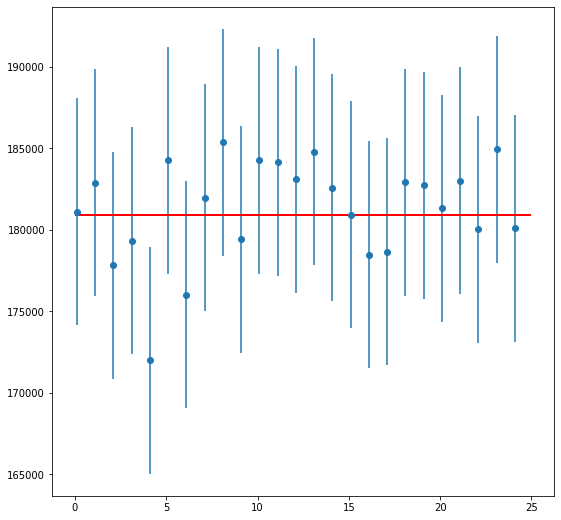

In [ ]:
plt.figure(figsize=(9,9))

plt.errorbar(x=np.arange(0.1, 25, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=25,
           y=data['SalePrice'].mean(), 
           linewidth=2.0,
           color="red")

### Notice that in the plot above, all but one of the 95% confidence intervals overlap the red line marking the true mean. This is to be expected: since a 95% confidence interval captures the true mean 95% of the time, we'd expect our interval to miss the true mean 5% of the times.

## John's Curiosity of OldTown 
***
 - Now, John is interested in dissecting the whole Real Estate Scene in OldTown
 
 - He's interested in seeing whether the prices of houses are different (on an average) when compared to the rest of Brooklyn 
 
 - John has just conjured up what is famously known as a "Hypothesis" 

## Hypothesis 
***
A statement that might be true, which can then be tested.

Example: Sam has a hypothesis that "large dogs are better at catching tennis balls than small dogs". We can test that hypothesis by having hundreds of different sized dogs try to catch tennis balls.

- The beauty of these Hypotheses are that they can be TESTED! 

## Hypothesis Testing 
***
- Statistical hypothesis tests are based a statement called the null hypothesis that assumes nothing interesting is going on between whatever variables you are testing. 
 
 - Therefore, in John's case the Null Hypothesis is that:
     - "The Mean of House Prices in OldTown is not different from the Houses all over Brooklyn

## Why Null Hypothesis? 
***
 - The purpose of a hypothesis test is to determine whether the null hypothesis is likely to be true given sample data.
 - If there is little evidence against the null hypothesis given the data, you accept the null hypothesis.
 - If the null hypothesis is unlikely given the data, you might reject the null in favor of the alternative hypothesis: that something interesting is going on.

## Alternative Hypothesis
***
 - This is nothing but the question you ask which kind of "opposes" the Null Hypothesis
 
 - Therefore, in John's case the Alternative Hypothesis is that:
     - "The Mean of House Prices in OldTown **IS** different from the Houses all over Brooklyn
     
 - Only 1 Hypothesis can be right
 
 - In hypothesis testing we test a sample, with the goal of accepting or rejecting a null hypothesis which is our assumption or the default position. The test tells us whether or not our primary hypothesis is true.
 

## Important
***

### The null hypothesis is assumed true and statistical evidence is required to reject it in favor of a research or alternative hypothesis

 - We require a standard on the available evidence to reject the null hypothesis (convict)


If we set a low standard
, then we would increase the percentage of innocent people convicted
; however we would also increase the percentage of guilty people convicted
(correctly rejecting the null)


If we set a high standard, then we increase the the percentage of innocent people let free
 while we would also increase the percentage of guilty people let free
(type II errors)

## Math behind Hypothesis Testing (1/2)
***
Once you have the null and alternative hypothesis in hand, you choose a significance level (often denoted by the Greek letter α). 

 - The significance level is a probability threshold that determines when you reject the null hypothesis.
 

## Math behind Hypothesis Testing (2/2)
***
- So we use this to calculate a "Test Statistic" that would further help us do further calculations
 ***
 ![](https://drive.google.com/uc?id=1UGFvzznJ2unrH14h1OzOdtTuJQBJJOMN)

## Math behind Hypothesis Testing 
***
 - After carrying out a test, if the probability of getting a result as extreme as the one you observe due to chance is lower than the significance level, you reject the null hypothesis in favor of the alternative. 
 
 - This probability of seeing a result as extreme or more extreme than the one observed is known as the *p-value*.

## Interpretation of p-value - EASY! (1/2)
***
- The p-value is really not as complicated as people make it sound

- So now say that we have put a significance (alpha) = 0.05
    - This means that if we see a p-value of lesser than 0.05, we reject our Null and accept the Alternative to be true 
    

## Interpretation of p-value - EASY! (2/2)
***

- What you have to understand is the data from your Null hypothesis follows a distribution (Normally distributed) 
     - Just imagine 1 bell curve of the data from the Null Hypothesis
     - Now imagine another bell curve which hypothetically defines your Alternative Hypothesis
     
     See below: 
        
 ***
 ![](https://drive.google.com/uc?id=1rTUO1uwltYpIGlamL5nPtzM_8mR8wq3w)

## Interpretation of p-value - EASY! (1/2)
***
 - So what the p-value says is that it is the Probability of finding the Alternative Hypothesis data in the Null Hypothesis data (bell curve 1!!) 
 
 - If it is lesser than 0.05(our threshold) then we reject it
 

## Interpretation of p-value - EASY! (2/2)
***
Why reject it though? 

 - BECAUSE OUR ALTERNATIVE HYPOTHESIS DATA IS REAL! NO ONE MADE IT UP! IT IS LEGIT DATA THAT IS OBSERVED AND NOT JUST FAKE! 
 - So if it is real, we can say that such data isn't really described by the Null Hypothesis (Bell Curve 1) therefore the Null must be rejected as being TRUE! 
 
 - It now makes sense! P-values are cool again 

#### Quiz : Statistical inference is the part of hypothesis testing that

A. helps you to prove the null hypothesis is false. 

B. helps you to determine the probability that a sample is from one population or another. 

C. helps you do determine if the research hypothesis is powerful. 

D. helps you to determine if the research hypothesis is true.

## Coming back to John 
***
 - Let's see how John did now
 - Are house prices in OldTown really different from the House Prices of Brooklyn? 
 
 

In [ ]:
from statsmodels.stats.weightstats import ztest
z_statistic, p_value = ztest(x1=data[data['Neighborhood'] == 'OldTown']['SalePrice'], value=data['SalePrice'].mean())
print('Z-statistic is :{}'.format(z_statistic))
print('P-value is :{}'.format(p_value))

Z-statistic is :-10.639294263334575
P-value is :1.9560526026260018e-26


## Summary of the p-value
***
* When performing a hypothesis test, the p-value is the probability of given or more extreme outcome given the null-hypothesis is true.

* We see that the p-value is close to zero i.e., the probability of getting the given distribution of houseprices in OldTown under the assumption that it its mean is the same as the mean of all house prices.
* So what can we infer from the p-value of our test? What should be the p-value beyond which we reject the null hypothesis.
* The p-value below which we reject our hypothesis depends on our **significance level** $\alpha$
* For a 95% signifigance level we reject our null hypothesis if p-value is below 0.05
* In this case we can reject the null hypothesis at 95% significance. 

## Another way to test: Gosset's (Student's) t-test
***
* The T-test is a statistical test used to determine whether a numeric data sample of differs significantly from the population or whether two samples differ from one another.
* A z-test assumes a sample size >30 to work, but what if our sample is less than 30?
* A t-test solves this problem and gives us a way to do a hypothesis test on a smaller sample.


Now, John also wants to see if house prices in `Stone Brook` neighborhood are different from the rest of the Houses in Brooklyn

In [ ]:
print('No of houses in Stone Brook: {}'\
      .format(data['Neighborhood'].value_counts()['StoneBr']))

No of houses in Stone Brook: 25


Lets do a t-test to test our hypothesis

In [ ]:
stats.ttest_1samp(a= data[data['Neighborhood'] == 'StoneBr']['SalePrice'],               # Sample data
                 popmean= data['SalePrice'].mean())  # Pop mean

Ttest_1sampResult(statistic=5.735070151700397, pvalue=6.558704101036394e-06)

* The p-value in this case again is low and we can reject our null hypothesis

### Type I and Type II Error
***
* If we again think of hypothesis test as a criminal trial then it makes sense to frame the verdict in terms of null and alternate hypothesis:

    * Null Hypothesis: Defendant is innocent
    * Alternate Hypothesis: Defendant is guilty

### Type I and Type II Error
***
* What type of error is being committed in the following circumstances?
    * Declaring the defendant guilty when they are actually innocent?
    * Declaring the defendant innocent when they are actually guilty?
    
* The first one is a type I error also known as a "false positive" or "false hit".
* The type 1 error rate is equal to the significance level α, so setting a higher confidence level (and therefore lower alpha) reduces the chances of getting a false positive.

* The second one is a type I error also known as a "false negative" or "miss". The higher your confidence level, the more likely you are to make a type II error.

 ***
 ![](https://drive.google.com/uc?id=1GtJgLYOCqSGwvLFgE09MDPj_jttexIbj)

 ***
![](https://drive.google.com/uc?id=1N_eJb_fhpiaxYz7lfYsLzUfcOQp28LOS)

## Type 1 Error 
***
Type I error describes a situation where you reject the null hypothesis when it is actually true. 

This type of error is also known as a false positive or false hit.

The type 1 error rate is equal to the significance level α, so setting a higher confidence level (and therefore lower alpha) reduces the chances of getting a false positive.

## Type 2 error
***
Type II error describes a situation where you fail to reject the null hypothesis when it is actually false. 

Type II error is also known as a false negative or miss. The higher your confidence level, the more likely you are to make a type II error.

### Chi-Squared Goodness-Of-Fit Test (1/2)
***
A chi-squared goodness of fit tests whether the distribution of sample categorical data matches an expected distribution. 

* For example, you could use a chi-squared goodness-of-fit test to check whether the race demographics of members at your church or school match that of the entire U.S. population or whether the computer browser preferences of your friends match those of Internet uses as a whole.

When working with categorical data the values the observations themselves aren't of much use for statistical testing because categories like "male", "female," and "other" have no mathematical meaning. 

### Chi-Squared Goodness-Of-Fit Test (2/2)
***
Tests dealing with categorical variables are based on variable counts instead of the actual value of the variables themselves.

Let's generate some fake demographic data for U.S. and Minnesota and walk through the chi-square goodness of fit test to check whether they are different:

In [ ]:
national = pd.DataFrame(["white"]*100000 + ["hispanic"]*60000 +\
                        ["black"]*50000 + ["asian"]*15000 + ["other"]*35000)          

minnesota = pd.DataFrame(["white"]*600 + ["hispanic"]*300 + \
                         ["black"]*250 +["asian"]*75 + ["other"]*150)

national_table = pd.crosstab(index=national[0], columns="count")
minnesota_table = pd.crosstab(index=minnesota[0], columns="count")

print( "National")
print(national_table)
print(" ")
print( "Minnesota")
print(minnesota_table)

National
col_0      count
0               
asian      15000
black      50000
hispanic   60000
other      35000
white     100000
 
Minnesota
col_0     count
0              
asian        75
black       250
hispanic    300
other       150
white       600


Chi-squared tests are based on the so-called chi-squared statistic. You calculate the chi-squared statistic with the following formula:

>$sum((observed−expected)^2/expected)$


In the formula, observed is the actual observed count for each category and expected is the expected count based on the distribution of the population for the corresponding category. 

Let's calculate the chi-squared statistic for our data to illustrate:

In [ ]:
observed = minnesota_table

national_ratios = national_table/len(national)  # Get population ratios

expected = national_ratios * len(minnesota)   # Get expected counts

chi_squared_stat = (((observed-expected)**2)/expected).sum()

print(chi_squared_stat)

col_0
count    18.194805
dtype: float64


**Note:** The chi-squared test assumes none of the expected counts are less than 5.

Similar to the t-test where we compared the t-test statistic to a critical value based on the t-distribution to determine whether the result is significant, in the chi-square test we compare the chi-square test statistic to a critical value based on the chi-square distribution. 

The scipy library shorthand for the chi-square distribution is chi2. 

Let's use this knowledge to find the critical value for 95% confidence level and check the p-value of our result:

In [ ]:
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 4)   # Df = number of variable categories - 1

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=4)
print("P value")
print(p_value)

Critical value
9.487729036781154
P value
[0.00113047]


**Note:** we are only interested in the right tail of the chi-square distribution. Read more on this [here](https://en.wikipedia.org/wiki/Chi-squared_distribution).

Since our chi-squared statistic exceeds the critical value, we'd reject the null hypothesis that the two distributions are the same.

You can carry out a chi-squared goodness-of-fit test automatically using the scipy function scipy.stats.chisquare():

In [ ]:
stats.chisquare(f_obs= observed,   # Array of observed counts
                f_exp= expected)   # Array of expected counts

Power_divergenceResult(statistic=array([18.19480519]), pvalue=array([0.00113047]))

The test results agree with the values we calculated above.

### Chi-Squared Test of Independence
***
Independence is a key concept in probability that describes a situation where knowing the value of one variable tells you nothing about the value of another. 

For instance, the month you were born probably doesn't tell you anything which web browser you use, so we'd expect birth month and browser preference to be independent. 

On the other hand, your month of birth might be related to whether you excelled at sports in school, so month of birth and sports performance might not be independent.

The chi-squared test of independence tests whether two categorical variables are independent. 



## John's final experiments
***
John wants to test if knowing `LandContour` which is the overall flatness of the property tells him anything about the price

 -  He has divided the `SalePrice` in three buckets - High, medium, low

In [ ]:
import scipy.stats as sp
def compute_freq_chi2(x,y):
    """This function will compute frequency table of x an y
    Pandas Series, and use the table to feed for the contigency table
    
    Parameters:
    -------
    x,y : Pandas Series, must be same shape for frequency table
    
    Return:
    -------
    None. But prints out frequency table, chi2 test statistic, and 
    p-value
    """
    freqtab = pd.crosstab(x,y)
    print("Frequency table")
    print("============================")
    print(freqtab)
    print("============================")
    chi2,pval,dof,expected = sp.chi2_contingency(freqtab)
    print("ChiSquare test statistic: ",chi2)
    print("p-value: ",pval)
    return

In [ ]:
price = pd.qcut(data['SalePrice'], 3, labels = ['High', 'Medium', 'Low'])
compute_freq_chi2(data.LandContour, price)

Frequency table
SalePrice    High  Medium  Low
LandContour                   
Bnk            32      20   11
HLS            10      12   28
Low             8      11   17
Lvl           437     447  427
ChiSquare test statistic:  26.252544346201447
p-value:  0.00019976918050008285


* The low p-value tells us that the two variables aren't independent and knowing the `LandContour` of a house does tells us something about its `SalePrice`.
* The frequency distribution reflects this.
* Houses that are Near Flat/Level(Lvl) have an equal distribution of `SalePrice`.
* On the other hand houses that are at a Hillside i.e., Significant slope from side to side (HLS) have almost thrice as much houses with low price than high prices.

### Next Session: Making your First Prediction with Linear Regression
***

- Concept - Making your first Prediction with Linear Regression
    - The motivation for Linear Regression
    - Assumptions for Linear Regression
    - Ordinary Least Squares method
    - Error metrics like RMSE, R-squared, MAE
